## LDA model of negative tweets

In [22]:
import pandas as pd
# NLP 
from wordcloud import WordCloud
import matplotlib.pyplot as plt            # library for visualization

In [23]:
#Import Data
tweets = pd.read_csv("/Volumes/GoogleDrive/My Drive/MCCNotes/Jlab projects/GITHUB_repositories/DRAE_repositories/PreprocessTweet/label_tweets.csv")
tweets.drop(['user_followers','retweets','favorites','user_verified','date','source','is_quote_status','is_retweet'], axis = 1, inplace = True)
tweets.head(5)

,user_location,text,flag
0,"San Francisco, CA",My #Tesla is paid for by my $TSLA,positive
1,"San Francisco, CA",Last year I made a small investment for my chi...,negative
2,"San Francisco, CA",finally!! #Tesla https://t.co/0rf2JmTI0V,positive
3,"San Francisco, California",Take a look @AlexSibila’s short about his Mode...,positive
4,"San Francisco, CA",21 Days to Christmas 🎄. What you all want for ...,positive


In [24]:
# Only take negative tweets
neg = tweets[tweets.flag == 'negative']
neg

,user_location,text,flag
1,"San Francisco, CA",Last year I made a small investment for my chi...,negative
6,San Francisco,Before I hear complaints about Germany’s eco-f...,negative
12,"San Francisco, CA",@klwtts $GM needs to go and most likely will b...,negative
13,"San Francisco, CA",German court has rejected a bid by environment...,negative
14,"San Francisco, California",Just in case you missed the New Hidden Easter ...,negative
15,"San Francisco, California",Just in case you missed the Hidden Easter Eggs...,negative
21,San Francisco,#Chinese court asks #Tesla to compensate Model...,negative
23,San Francisco,@CNBC I'm not surprised to hear this as more c...,negative
34,"San Francisco, CA",Fuck #tesla less than 10% of people of color i...,negative
41,"San Francisco, CA",#PhantomBraking much worse on #Tesla 2020.48.1...,negative


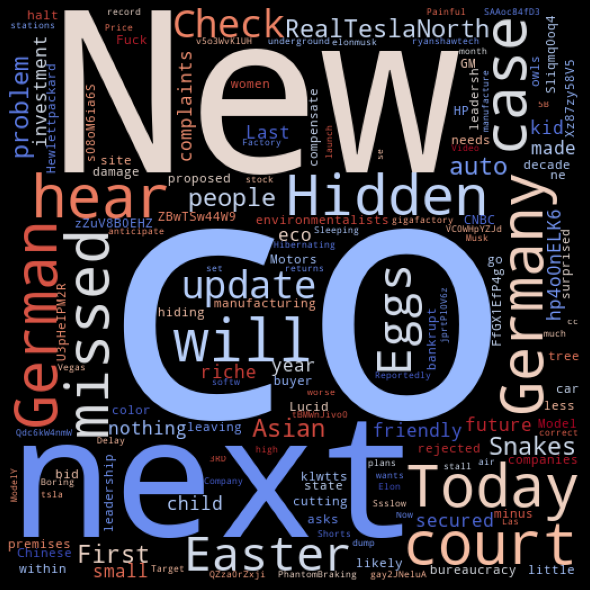

In [25]:
from wordcloud import STOPWORDS , WordCloud
stopwords = set(STOPWORDS)
stopwords.update(["https",'tesla'])

depression_words = ' '.join(list(tweets[tweets['flag'] == 'negative']['text']))
dep_wc = WordCloud(stopwords = stopwords,width = 512,height = 512, collocations=False, colormap="coolwarm").generate(depression_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(dep_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [26]:
#!pip install wordcloud

# Preprocessing
import nltk # Python library for NLP

import random                              # pseudo-random number generator
import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer, SnowballStemmer    # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer 
#nltk.download('stopwords')
#nltk.download('wordnet')
#classification
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import model_selection
from sklearn import feature_extraction
from collections import Counter
from nltk.util import ngrams
#nltk.download('punkt')

In [27]:
class TweetClassify():

    def __init__(self, tweets_df, column_name , stemm = False, lemm =True):
        self.tweets_ = tweets_df
        self.stemm_ = stemm
        self.lemm_ = lemm
        self.lemmatizer_ = WordNetLemmatizer()
        self.vect_wc = feature_extraction.text.CountVectorizer(max_features = 10000, ngram_range=(1,2))
        self.vect_tfidf = feature_extraction.text.TfidfVectorizer(max_features = 10000, ngram_range=(1,2))
        self.stopwords_eng_ = nltk.corpus.stopwords.words('english')
        self.preprocess(column_name)
    def preprocess(self, column_name):
        self.tweets_['tweets_clean'] = self.tweets_[column_name].apply(lambda x: self.clean_text(x, stemm= self.stemm_, lemm = self.lemm_ ,stop_words = self.stopwords_eng_))


    def clean_text(self,observation,stemm , lemm , stop_words):
        #Clean tweets (removing punctuations and converting everything to lowercase)
        
        observation = re.sub(r'[^\$\w\s]', '', str(observation).lower().strip())
        observation = re.sub(r'^RT[\s]+', '', observation)
        observation = re.sub(r'https?:\/\/.*[\r\n]*', '', observation) # removing hyperlinks
        observation = re.sub(r'#', '', observation) #removing hash # sign


        #Tokenize (converting strings to lists)
        tokens_list = observation.split()
        tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
        tokens_list = tokenizer.tokenize(observation)
        #Remove the Stopwords
        stop_words = set(stop_words)
        stop_words.update(["tesla"])
        if stop_words is not None:
            stop_text = []
            for word in tokens_list: 
                if (word not in stop_words and  # remove stopwords
        word not in string.punctuation ): # remove punctuation
                    word_ = ''
                    for char in word:
                        if (char not in string.punctuation and
                            char not in ['1','2','3','4','5','6','7','8','9','0','',' ']):
                            word_ = "".join((word_,char))
                    stop_text.append(word_)
                    tokens_list = stop_text.copy()

        if lemm == True:
            lem_text = []
            for word in tokens_list: # Go through every word in the tokens list
                # Init the Wordnet Lemmatizer
                lem_word = self.lemmatizer_.lemmatize(word,'v')
                lem_text.append(lem_word)
            tokens_list = lem_text.copy()
        
        tweets_clean = " ".join(tokens_list)

        return tokens_list

In [28]:
from nltk.tokenize import TweetTokenizer
tweets_processed = TweetClassify(neg, column_name='text')

In [29]:
neg

,user_location,text,flag,tweets_clean
1,"San Francisco, CA",Last year I made a small investment for my chi...,negative,"[last, year, make, small, investment, child, n..."
6,San Francisco,Before I hear complaints about Germany’s eco-f...,negative,"[hear, complaints, germanys, ecofriendly, bure..."
12,"San Francisco, CA",@klwtts $GM needs to go and most likely will b...,negative,"[klwtts, gm, need, go, likely, bankrupt, withi..."
13,"San Francisco, CA",German court has rejected a bid by environment...,negative,"[german, court, reject, bid, environmentalists..."
14,"San Francisco, California",Just in case you missed the New Hidden Easter ...,negative,"[case, miss, new, hide, easter, egg, update, ,..."
15,"San Francisco, California",Just in case you missed the Hidden Easter Eggs...,negative,"[case, miss, hide, easter, egg, update, , , ch..."
21,San Francisco,#Chinese court asks #Tesla to compensate Model...,negative,"[chinese, court, ask, compensate, model, buyer..."
23,San Francisco,@CNBC I'm not surprised to hear this as more c...,negative,"[cnbc, im, surprise, hear, company, leave, sta..."
34,"San Francisco, CA",Fuck #tesla less than 10% of people of color i...,negative,"[fuck, less, , people, color, leadership, minu..."
41,"San Francisco, CA",#PhantomBraking much worse on #Tesla 2020.48.1...,negative,"[phantombraking, much, worse, , , modely, cc, ..."


## Corpus

In [30]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from bs4 import BeautifulSoup
from gensim.models import CoherenceModel
from gensim import corpora, models

In [31]:
processed_docs=neg['tweets_clean'] 
id2word = gensim.corpora.Dictionary(processed_docs) # Create Dictionary
corpus = [id2word.doc2bow(text) for text in processed_docs] #Create Corpus: TDF

In [32]:
id2word.save_as_text('dict_.txt')
id2word.save('id2word.dict')

## K topics

Coherence Score = degree of semantic similarity between high scoring words in the topic

In [33]:
def coherence(dictionary, corpus, texts, start, stop):
    values = []
    models = []
    for num_topics in range(start, stop):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                                num_topics=num_topics,
                                                id2word=id2word,
                                               random_state=123,
                                               alpha='auto',
                                                eta='auto',
                                               per_word_topics=True)
        models.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        values.append(coherencemodel.get_coherence())

    return models, values

In [34]:
start=3
stop=9
models, values = coherence(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=processed_docs,
                                                        start=start, 
                                                        stop=stop)

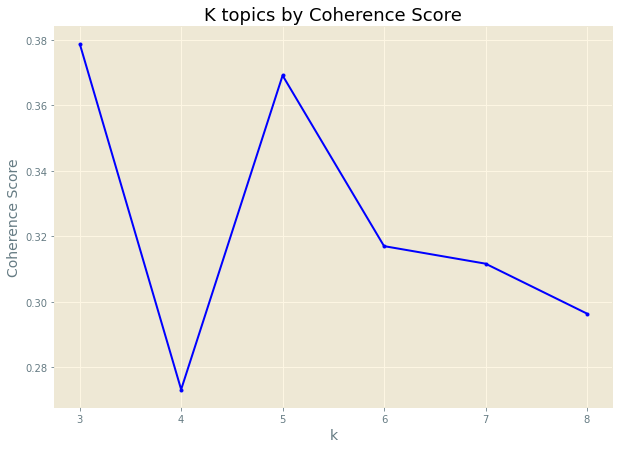

In [50]:
x = range(start, stop)
plt.figure(figsize=(10,7))
plt.style.use('Solarize_Light2')
plt.plot(x, values, color = "blue",marker=".")
plt.xlabel("k", size=14)
plt.ylabel("Coherence Score", size=14)
plt.title('K topics by Coherence Score',size=18)
plt.show()

## LDA model

In [51]:
k_topics = 3
rs = 42

In [52]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=k_topics, 
                                           random_state=rs,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='auto',
                                           eta='auto',
                                           iterations=125,
                                           per_word_topics=True)
doc_lda = lda_model[corpus]

AttributeError: module 'pyLDAvis.gensim' has no attribute 'models'

In [38]:
from pprint import pprint
pprint(lda_model.print_topics())

[(0,
  '0.034*"" + 0.013*"teslas" + 0.013*"german" + 0.011*"today" + '
  '0.011*"manufacture" + 0.011*"hide" + 0.011*"check" + 0.011*"court" + '
  '0.011*"easter" + 0.011*"egg"'),
 (1,
  '0.025*"" + 0.018*"people" + 0.018*"hide" + 0.011*"new" + '
  '0.011*"realteslanorth" + 0.011*"egg" + 0.011*"case" + 0.011*"easter" + '
  '0.011*"asians" + 0.011*"miss"'),
 (2,
  '0.037*"new" + 0.037*"" + 0.019*"auto" + 0.019*"snake" + 0.014*"next" + '
  '0.014*"company" + 0.014*"first" + 0.011*"las" + 0.011*"httpstcotbmwnjivo" + '
  '0.011*"month"')]


In [39]:
from string import punctuation
class ProcessTweet():

    def __init__(self,  stemm = False, lemm =True):
        #self.tweet_ = tweet
        self.stemm_ = stemm
        self.lemm_ = lemm
        self.stemmer_ = nltk.stem.SnowballStemmer('english')
        self.lemmatizer_ = nltk.stem.WordNetLemmatizer()
        self.vect_wc = feature_extraction.text.CountVectorizer(max_features = 10000, ngram_range=(1,2))
        self.vect_tfidf = feature_extraction.text.TfidfVectorizer(max_features = 10000, ngram_range=(1,2))
        self.stopwords_eng_ = nltk.corpus.stopwords.words('english')

    def preprocess(self, tweet):
        clean_tweet = self.clean_text(tweet, stemm= self.stemm_, lemm = self.lemm_ ,stop_words = self.stopwords_eng_)
        
        return clean_tweet

    def clean_text(self, observation, stemm, lemm, stop_words):
        #Clean tweets (removing punctuations and converting everything to lowercase)
        observation = re.sub(r'[^\$\w\s]', '', str(observation).lower().strip())
        observation = re.sub(r'^RT[\s]+', '', observation)
        observation = re.sub(r'https?:\/\/.*[\r\n]*', '', observation) # removing hyperlinks
        observation = re.sub(r'#', '', observation) #removing hash # sign

        #Tokenize (converting strings to lists)
        tokens_list = observation.split()
        tokenizer = nltk.tokenize.TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
        tokens_list = tokenizer.tokenize(observation)
        #Remove the Stopwords
        stop_words = set(stop_words)
        stop_words.update(["american", "air","airline","thank","united","us","airways","virgin","america","jetblue","youre","extremely",
                     "usairway","usairways","flight","americanair","southwestair","southwestairlines","arbitrarily","dream","crazy",
                     "southwestairway","southwestairways","virginamerica","really","will","going","thanks","thankyou","passengersdont",
                     "please","got","let","take","help","already","never","now","told","guy","new","sure","still","amp","continue",
                     "plane","tell","ye","trying","yes","guy","much","appreciate", "thx","back","ok","good","credit","aacom",
                     "flying","love","great","awesome","see","nice","alway","httptcojwl26g6lrw","dontflythem","motherinlaw","night",
                     "nogearnotraining","seriously","didnt","coudnt","cant","wont","dont","wat","buffaloniagara","hasshe","morning",
                     "woulda","people","try","youve","youd","yours","flightled","tomorrow","today","wat","jfkyou","flite","cause",
                     "flightr","flight","need","hours","nooooo","like","doesnt","right","talk","tweet","mention","pbijfk","ridiculuous",
                     "wasnt","suppose","want","understand","come","work","worse","treat","think","know","worst","paulo","staduim",
                     "wouldnt","stay","away","wont","werent","happen","sorry","havent","tonight","drive","life","thing","aa951",
                     "whats","theyre","better","thats","allow","hope","stop","cool","niece","happy","word","customercant",
                     "suck","sunday","monday","tuesday","wednesday","thursday","friday","saturday","weekend","ruin","shouldnt",
                     "miami","los angeles","new york","chicago","dallas","apparently","itover","someones","savannah","lucymay",
                     "betterother","instead","look","hopefully","yesterday","antonio","unacceptable","folks","record",'arent',
                     "miss","hang","wrong","stick","grind","tarmac","theres","forget","terrible","clothe","terrible","break",
                     "actually","frustrate","correct","ridiculous","expect","different","pathetic","bother","follow","fault",
                     "impossible","point","cover","person","ask","speak","things","earlier","mean","select","minutes",
                     "unite","horrible","country","leave","speak","apologize","faster","hop","confuse","lose","flightd","hear",
                     "literally","years","surprise","bump","fail","compensate","hand","helpful","upset","friend","excuse","claim",
                     "situation","multiple","weather","choose","company","believe","question","kick","anymore","awful","delta",
                      "dozen","medical","completely","finally", "waste","shock","annoy","maybe","strand","mess","finally",
                      "plan","place","apology","center","plan","twitter","promise","prefer","count","maybe","shock","longer","meet",
                         "important","drop"])
        if stop_words is not None:
            stop_text = []
            for word in tokens_list: 
                if (word not in stop_words and  # remove stopwords
        word not in punctuation ): # remove punctuation
                    word_ = ''
                    for char in word:
                        if (char not in punctuation and
                            char not in ['1','2','3','4','5','6','7','8','9','0','',' ']):
                            word_ = "".join((word_,char))
                    stop_text.append(word_)
                    tokens_list = stop_text.copy()
        if stemm == True:
            stem_text = []
            for word in tokens_list: # Go through every word in the tokens list
                # Init the Stemmer
                stem_word = self.stemmer_.stem(word)
                stem_text.append(stem_word)
            tokens_list = stem_text.copy()
        if lemm == True:
            lem_text = []
            for word in tokens_list: # Go through every word in the tokens list
                # Init the Wordnet Lemmatizer
                lem_word = self.lemmatizer_.lemmatize(word)
                lem_text.append(lem_word)
            tokens_list = lem_text.copy()
        return tokens_list

In [42]:
id2word = corpora.Dictionary.load('id2word.dict')

message = '''Tesla is not designing a premium leather only car interior!!!
                    '''
clean_class = ProcessTweet()
clean_tweet = clean_class.preprocess(message)
clean_tweet

['tesla', 'designing', 'premium', 'leather', 'car', 'interior']

In [43]:
bow_vector = id2word.doc2bow(clean_tweet)
result = lda_model.get_document_topics(bow_vector)
resultdict = dict(result)

In [44]:
resultdict

{0: 0.024463305, 1: 0.92601436, 2: 0.04952237}

In [46]:
orddict = sorted(resultdict, key=resultdict.get, reverse=True)
Keymax = 1
if resultdict[orddict[0]]-resultdict[orddict[1]] <=.08:
    Keymax +=orddict[1]
    print("Predicted topic: ",orddict[1]+1)
    print("Probability Score: ",resultdict[orddict[1]])
else:
    Keymax +=orddict[0]
    print("Predicted topic: ",orddict[0]+1)
    print("Probability Score: ",resultdict[orddict[0]])

#Keymax = max(resultdict, key=resultdict.get)+1
#print("Predicted Topic :", Keymax) 


if Keymax == 1:
    print('Topic 1')
elif Keymax == 2:
    print('Topic 2')
elif Keymax == 3:
    print('Topic 3')
else:
    print('Other')
print("\n")

for index, score in resultdict.items():
    print("Score: {}\n Topic: {}\n Keywords:{} \n".format(score, index+1, lda_model.print_topic(index)))

Predicted topic:  2
Probability Score:  0.92601436
Topic 2


Score: 0.02446330524981022
 Topic: 1
 Keywords:0.034*"" + 0.013*"teslas" + 0.013*"german" + 0.011*"today" + 0.011*"manufacture" + 0.011*"hide" + 0.011*"check" + 0.011*"court" + 0.011*"easter" + 0.011*"egg" 

Score: 0.9260143637657166
 Topic: 2
 Keywords:0.025*"" + 0.018*"people" + 0.018*"hide" + 0.011*"new" + 0.011*"realteslanorth" + 0.011*"egg" + 0.011*"case" + 0.011*"easter" + 0.011*"asians" + 0.011*"miss" 

Score: 0.04952237010002136
 Topic: 3
 Keywords:0.037*"new" + 0.037*"" + 0.019*"auto" + 0.019*"snake" + 0.014*"next" + 0.014*"company" + 0.014*"first" + 0.011*"las" + 0.011*"httpstcotbmwnjivo" + 0.011*"month" 



## Visualize 

In [47]:

import pyLDAvis
from pyLDAvis import gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,sort_topics=False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.043202 -0.041332       1        1  25.378268
1     -0.059455  0.037188       2        1  29.896048
2      0.102657  0.004144       3        1  44.725684, topic_info=              Term      Freq     Total Category  logprob  loglift
58             new  4.000000  4.000000  Default  30.0000  30.0000
94          people  1.000000  1.000000  Default  29.0000  29.0000
55            hide  1.000000  1.000000  Default  28.0000  28.0000
54             egg  1.000000  1.000000  Default  27.0000  27.0000
51            case  1.000000  1.000000  Default  26.0000  26.0000
..             ...       ...       ...      ...      ...      ...
160          softw  0.934308  1.339357   Topic3  -4.5465   0.4445
158        problem  0.934308  1.339357   Topic3  -4.5465   0.4445
157  httpstcosaaoc  0.934308  1.339357   Topic3  -4.5465   0.4445
50                  3.246404  6.415585   Topic3  -3.3010   0.1234
33            next  1.254369  2.076948   Topic3  -4.2519   0.3004

[147 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
50        1  0.311741        
50        2  0.155870        
50        3  0.467611        
84        2  1.014546   asian
85        2  1.014546  asians
...     ...       ...     ...
112       3  0.746627      vz
25        2  1.014546       w
95        2  1.014546   women
13        1  1.057685    year
61        2  1.014546     zyv

[123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])